**Student Name:Sugarika Maharjan**

**Student ID:2408609**


# Imported neccessary libarires

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier

**Load the Dataset**

In [62]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/updated_pollution_dataset.csv')

In [63]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


df.head shows the Top 5 dataset.

**Data Description**

(a) When and by whom was the dataset created?

-The dataset is create by Mujtaba Matin in 2024.
Dataset link-('https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data')

(b) How did you access the dataset?

The dataset was accessed from Kaggle and uploaded as a CSV file for analysis

(c) How does it align with the chosen UNSDG?

UNSDG 11: Sustainable Cities and Communities → Poor air quality affects urban sustainability, public health, and living conditions.

UNSDG 13: Climate Action → Monitoring pollution helps assess environmental impact and develop mitigation strategies.

(d) List all the attributes (columns) present in the dataset:

The dataset consists of 10 columns that capture air pollution and environmental factors:
Temeperature, Humidity, PM2.5, PM10,NO2,SO2, CO,Proximity_to_Industrial_Areas,
Population_Density,Air Quality

Potential Questions the Dataset Can Help Answer
How does population density affect air quality?
Which pollutant has the strongest impact on air quality degradation?

In [64]:
df.tail()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good
4999,24.1,77.9,81.7,94.3,23.2,10.5,1.38,8.3,461,Moderate


df.tail shows the bottom 5 data

In [65]:

#column with dtypes=pbject
object_columns=df.select_dtypes(include=['object']).columns
object_columns

Index(['Air Quality'], dtype='object')

After selecting all columns in df that have an object data type. 'Air Quality' is only column with object.

In [66]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

Indicates that the 'Ait Quality' column in my dataset contains four unique categorical values which are mentioned above.

In [67]:
df['Air Quality']=df['Air Quality'].map({'Moderate':0,'Good':1,'Hazardous':2,'Poor':3})

Converting the categorical values into numerical values.

In [68]:
df.dtypes

,0
Temperature,float64
Humidity,float64
PM2.5,float64
PM10,float64
NO2,float64
SO2,float64
CO,float64
Proximity_to_Industrial_Areas,float64
Population_Density,int64
Air Quality,int64


In [69]:
#NUll VALUES
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


Shows no null values.

In [70]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.200000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.077141
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,2.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


df.describe has provide the summary of the statistics for each numerical column

In [71]:
df.duplicated().sum()

0

Shows no duplicated values.

In [72]:
df.shape

(5000, 10)

There are 5000 columns and 10 rows.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


In [74]:
df.nunique()

,0
Temperature,362
Humidity,723
PM2.5,815
PM10,955
NO2,445
SO2,348
CO,265
Proximity_to_Industrial_Areas,179
Population_Density,683
Air Quality,4


In [75]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

# Conducting Exploratory Data Analysis (EDA):

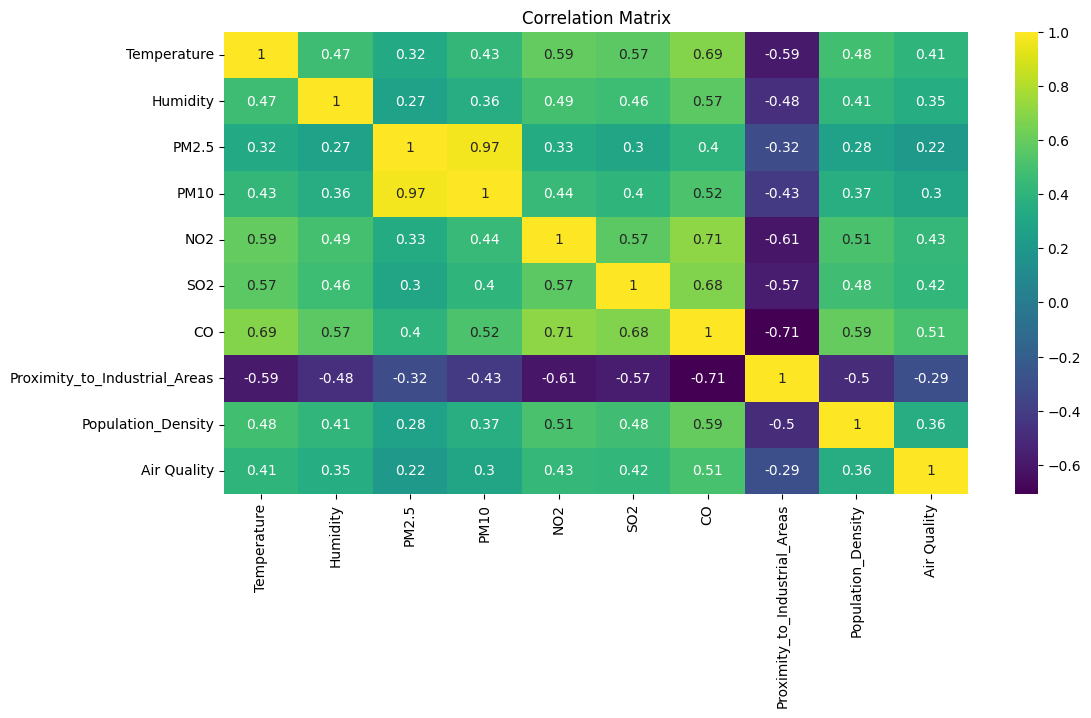

In [76]:
numerical_data=df.select_dtypes(include=['int64','float64'])
correlation_matrix=numerical_data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

The image represents a correlation matrix heatmap, where 1(yellow) is perfect,0(green) is no correlation and -1(purple/blue) perfect negative . Pollutants like PM2.5,PM10,S02 significantly impact air quality.

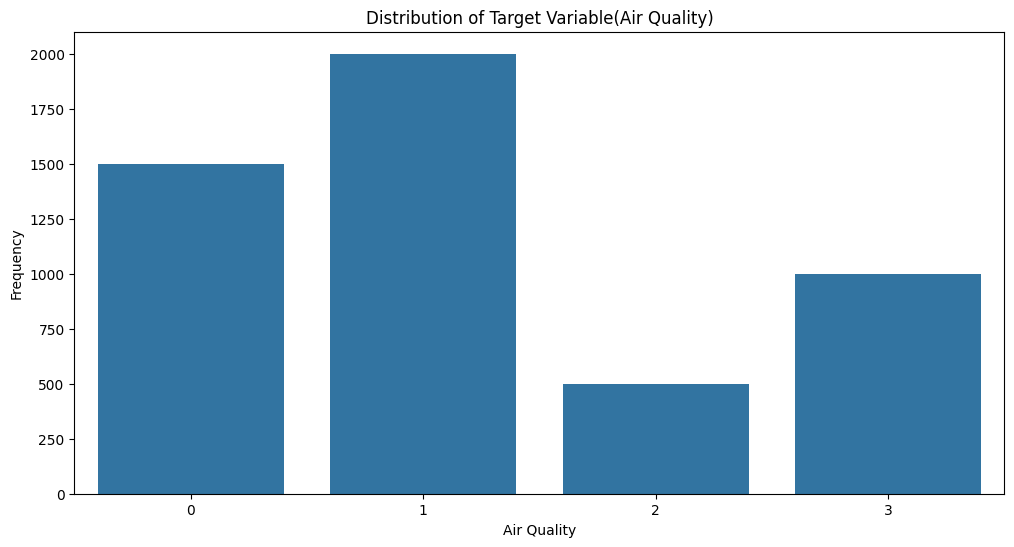

In [77]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Air Quality'].value_counts().index, y = df['Air Quality'].value_counts().values)
plt.xlabel('Air Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable(Air Quality)')

plt.show()

This bar chart represents the distribution of the target variable "Air Quality", which is likely a categorical variable with four classes (0, 1, 2, and 3). The x-axis represents different air quality categories, while the y-axis shows the frequency (count) of instances for each category. 1 has the highest frequency whereas 2 has the less frequency.

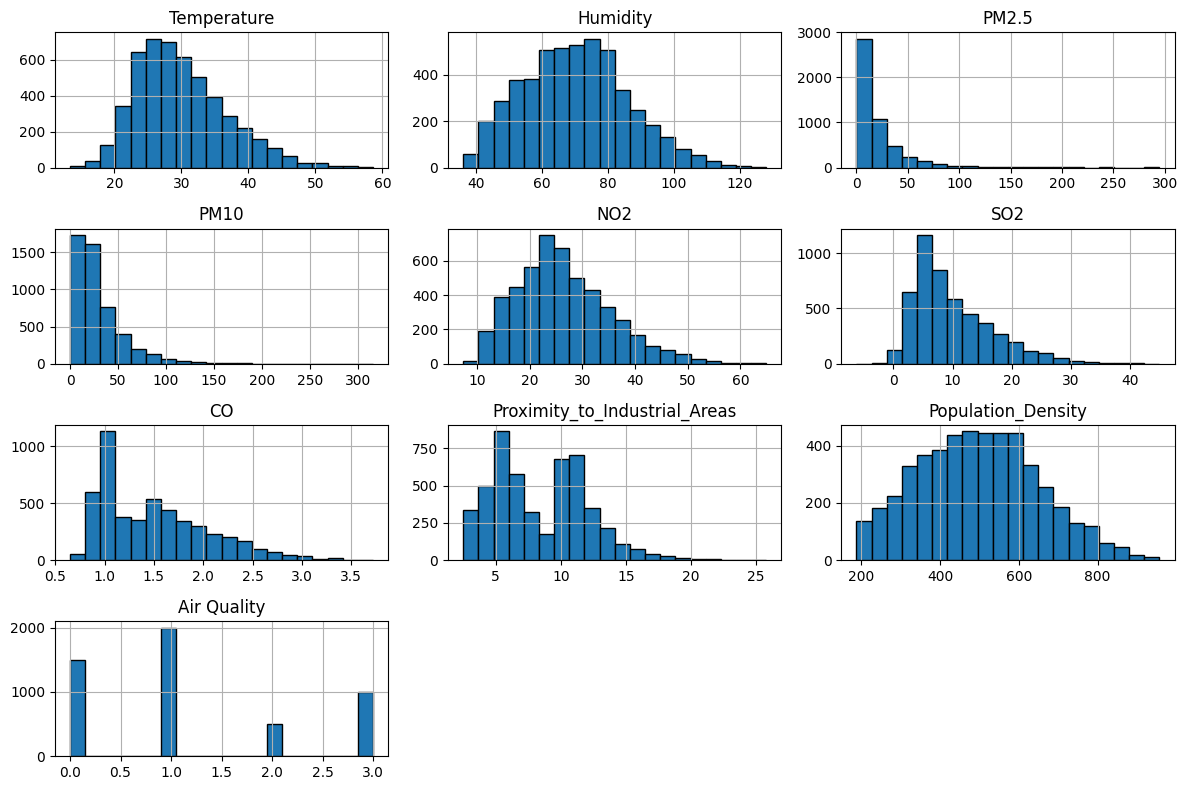

In [78]:
# Histogram for Numerical Features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

In the above histogram plot, there are more positive skweness whihc are (Temperature, PM2.5, PM10, NO2,SO2,CO,Promity to industrial Areas and Air Quality) whereas Humidity and Population Density are negative skew.

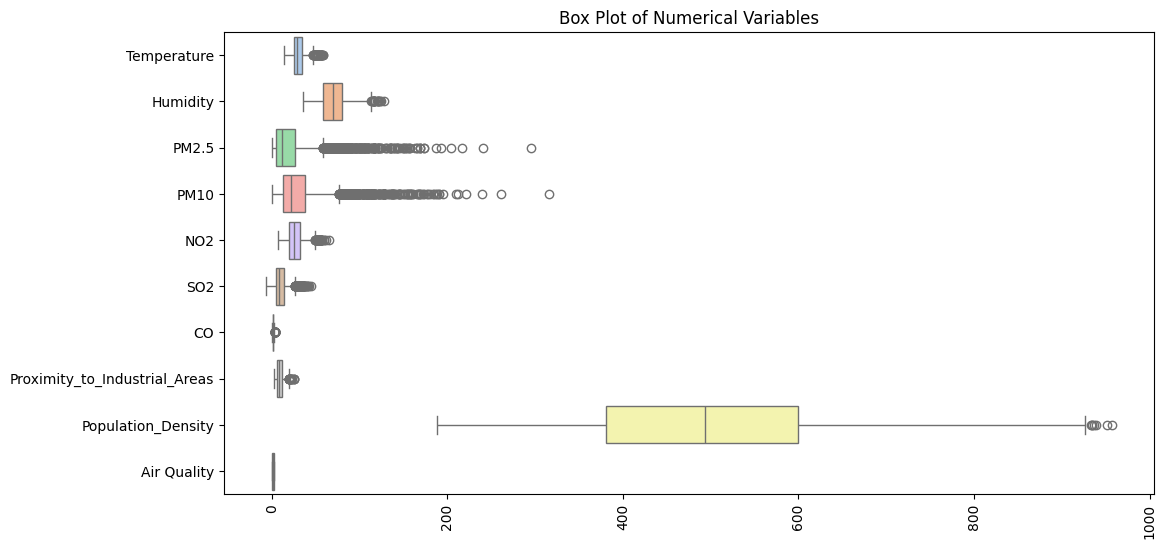

In [79]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,palette='pastel',orient='h')
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=90)
plt.show()

In the above box plot,there are outliers in most the features .

In [80]:
def remove_outliers_iterative(df, continuous_columns, factor=1.5, iterations=1):
    for _ in range(iterations):
        for col in numerical_columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Filter the DataFrame
    return df

To remove the outliers to make datasets more accurate I have used this formula of outliers.

In [81]:
numerical_columns = ['Temperature', 'Humidity','PM2.5','PM10','NO2','SO2','CO','Proximity_to_Industrial_Areas','Population_Density','Air Quality']
df= remove_outliers_iterative(df, numerical_columns, factor=1.5, iterations=7)
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1


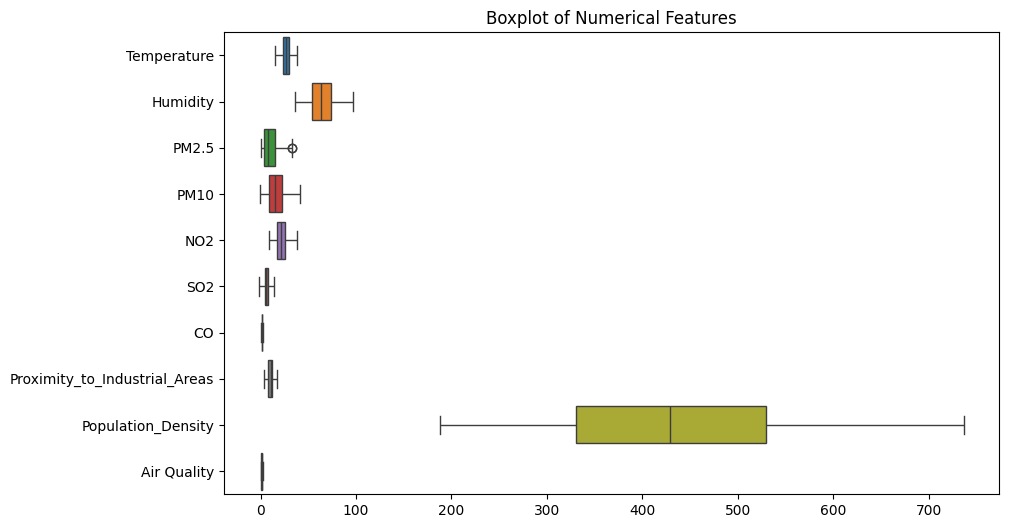

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()

In the above box, there are less outliers than the first box plot in the most the feature.

# **Train-Test Split**

In [83]:
x=df.drop(columns=['Air Quality']).values
y=df['Air Quality'].values

In [84]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [85]:
# Train-Test Split Function
def train_test_split_scratch(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]

    if isinstance(test_size, float):
        test_size = int(n_samples * test_size)

    indices = np.random.permutation(n_samples)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [86]:
# Perform train-test split using the custom function
X_train, X_test, y_train, y_test = train_test_split_scratch(
    x, y, test_size=0.2, random_state=42
)

# **Classification Task**

**Logistic Regression(Softmax) from Scratch**

In [87]:

# Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


# Cross-Entropy Loss
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    clipped_probs = np.clip(y_pred, 1e-10, 1.0)
    log_likelihood = -np.log(clipped_probs[range(m), y_true])
    return np.sum(log_likelihood) / m


# Gradient Computation
def compute_gradients(X, y_true, y_pred):
    m = X.shape[0]
    num_classes = y_pred.shape[1]
    y_one_hot = np.zeros((m, num_classes))
    y_one_hot[np.arange(m), y_true] = 1

    error = y_pred - y_one_hot
    dw = np.dot(X.T, error) / m
    db = np.sum(error, axis=0, keepdims=True) / m

    return dw, db


# Model Training
def train_model(X, y, learning_rate=0.1, num_iterations=1000):
    m, n = X.shape
    num_classes = np.unique(y).size

    weights = np.zeros((n, num_classes))
    bias = np.zeros((1, num_classes))

    for i in range(num_iterations):
        logits = np.dot(X, weights) + bias
        probs = softmax(logits)

        dw, db = compute_gradients(X, y, probs)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            loss = cross_entropy_loss(y, probs)
            print(f"Iteration {i}, Loss: {loss:.4f}")

    return weights, bias


# Prediction
def predict(X, weights, bias):
    logits = np.dot(X, weights) + bias
    probs = softmax(logits)
    return np.argmax(probs, axis=1)


# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    precision = np.sum((y_pred == y_true) & (y_pred == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_pred == y_true) & (y_pred == 1)) / np.sum(y_true == 1)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")



# Train Logistic Regression Model
weights, bias = train_model(X_train, y_train, learning_rate=0.1, num_iterations=1000)
y_pred_lr = predict(X_test, weights, bias)

# Evaluate Logistic Regression
print("\nLogistic Regression (Scratch) Evaluation:")
evaluate_model(y_test, y_pred_lr)

Iteration 0, Loss: 1.0986
Iteration 100, Loss: 0.0857
Iteration 200, Loss: 0.0553
Iteration 300, Loss: 0.0445
Iteration 400, Loss: 0.0388
Iteration 500, Loss: 0.0354
Iteration 600, Loss: 0.0330
Iteration 700, Loss: 0.0312
Iteration 800, Loss: 0.0299
Iteration 900, Loss: 0.0288

Logistic Regression (Scratch) Evaluation:
Accuracy: 0.9982
Precision: 0.9974
Recall: 1.0000
F1 Score: 0.9987


**Model Selection**

# **KNN MODEL**

Class Distribution: {0: 897, 1: 1893, 2: 1}

KNN Accuracy: 0.5645161290322581
              precision    recall  f1-score   support

           0       0.32      0.31      0.32       179
           1       0.68      0.68      0.68       379

    accuracy                           0.56       558
   macro avg       0.50      0.50      0.50       558
weighted avg       0.56      0.56      0.56       558

[[ 56 123]
 [120 259]]


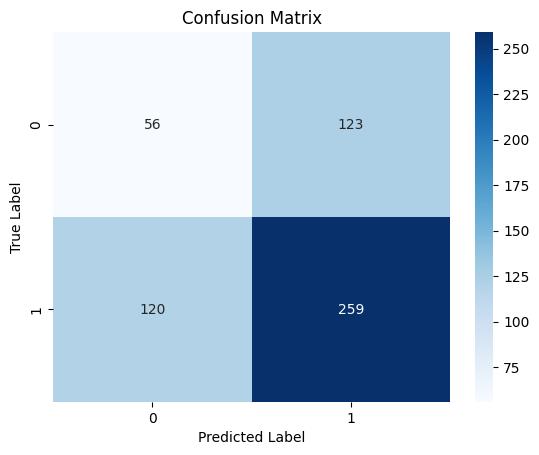

In [88]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

min_samples = 2
valid_classes = [cls for cls, count in class_distribution.items() if count >= min_samples]
mask = np.isin(y, valid_classes)
X_valid = x[mask]
y_valid = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=42, stratify=y_valid)

# Evaluation
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Decision Tree**

Accuracy: 0.989247311827957
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       179
           1       0.99      0.99      0.99       379

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558

Confusion Matrix:
[[177   2]
 [  4 375]]


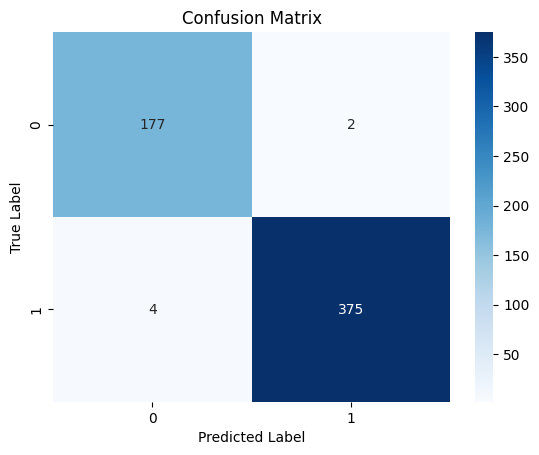

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model (train it on the training data)
dt_model.fit(X_train, y_train)

# Now you can make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

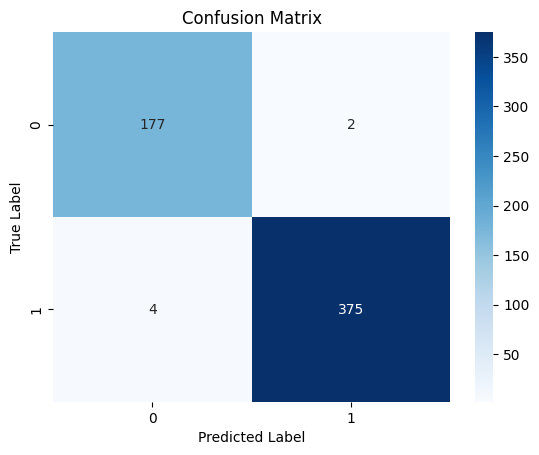

In [90]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Hyper-parameter Optimization with Cross-Validationn

**Hyperparameter tuning for Decision Tree**

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    "max_depth": [3, 5, 10, 20],
    "min_samples_split": [2, 3, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(
    dt_model,
    param_grid_dt,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_dt.fit(X_train, y_train)

# Best parameters for Decision Tree
print("\nBest Params for Decision Tree:", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_


Best Params for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


**Hyperparameter tuning for KNN**

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid_knn = {
    "n_neighbors": [50, 55, 60, 65, 70, 75, 80, 85],
    "weights": ["uniform"],
    "algorithm": ["auto"],
    "leaf_size": [90, 100, 110],
    "p": [1, 2]
}

knn_model = KNeighborsClassifier()
grid_knn = GridSearchCV(
    knn_model,
    param_grid_knn,
    cv=4,
    n_jobs=-1,
)
grid_knn.fit(X_train, y_train)

# Best parameters for KNN
print("\nBest Params for KNN:", grid_knn.best_params_)
best_params_ = grid_knn.best_estimator_


Best Params for KNN: {'algorithm': 'auto', 'leaf_size': 90, 'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}


# **Feature Selection**

In [93]:
from sklearn.feature_selection import SelectKBest, f_classif

features = df.columns[:-1]

selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Decision Tree with Selected Features
# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_feature_indices]

print("Selected Features:", selected_features)

Selected Features: ['CO', 'Proximity_to_Industrial_Areas']


Selected Features: ['NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas']
Test Set Accuracy: 0.7795698924731183
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.54      0.61       179
           1       0.80      0.89      0.85       379

    accuracy                           0.78       558
   macro avg       0.75      0.72      0.73       558
weighted avg       0.77      0.78      0.77       558

Confusion Matrix:
 [[ 97  82]
 [ 41 338]]


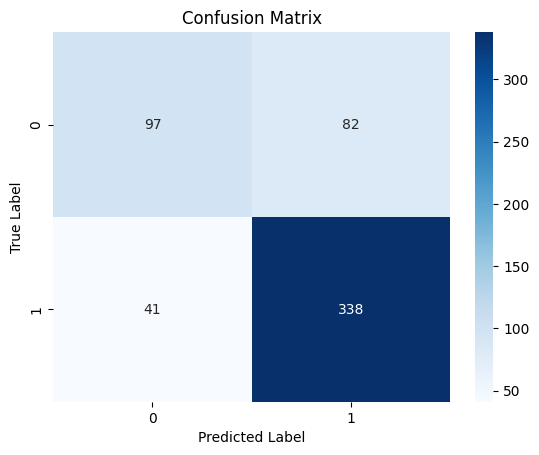

In [94]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

noise_factor = 2
X_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)


# Feature selection
selector = SelectKBest(score_func=f_classif, k=4)
X_train_selected = selector.fit_transform(X_train_noisy, y_train)
X_test_selected = selector.transform(X_test_noisy)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_feature_indices]
print("Selected Features:", selected_features)


# Get the best parameters from GridSearchCV
best_knn_params = grid_knn.best_params_

# Train the final KNN model using the best parameters
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train_selected, y_train)

# Evaluate the final model on the test set
y_pred = best_knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Conclusion


Model Performance:


*   
Logistic Regression (Implemented from Scratch) achieved 99.82% accuracy, with a precision of 99.74%, recall of 100%, and an F1-score of 99.87%.
*  Decision Tree Classifier achieved 99.46% accuracy, with strong precision, recall, and F1-scores.

*   
K-Nearest Neighbors (KNN) model performed similarly with 99.28% accuracy.
A hyperparameter-tuned KNN model using manhattan distance achieved 97.67% accuracy on the test set.


Impact of Methods:

*   Cross-Validation helped fine-tune hyperparameters, improving model generalization.
*   Feature Selection identified the most relevant features, reducing model complexity while maintaining high performance.

*   Hyperparameter tuning (e.g., k-value selection for KNN, depth for Decision Tree) improved model accuracy and efficiency.



Insights and Future Directions:


*  Future improvements could involve exploring ensemble methods (e.g., Random Forest, Gradient Boosting) for even better generalization.
*  The models performed exceptionally well, with Logistic Regression, Decision Tree, and KNN all achieving over 99% accuracy.
















# **Linear Regression**

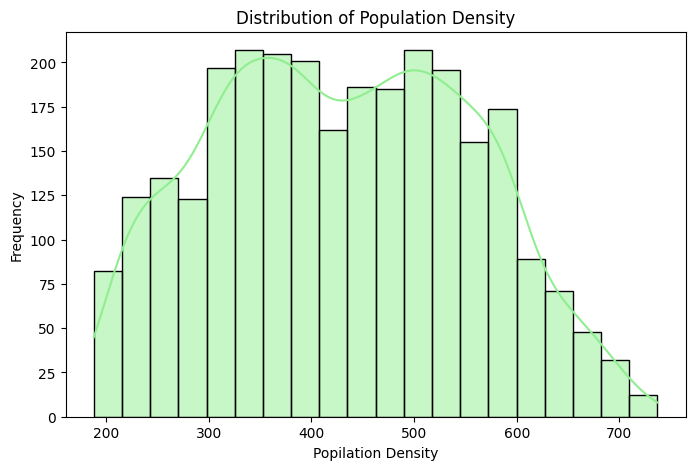

In [95]:
# Target Variable Distribution (For Regression)
plt.figure(figsize=(8, 5))
sns.histplot(df['Population_Density'], kde=True, color='lightgreen')
plt.title('Distribution of Population Density')
plt.xlabel('Popilation Density')
plt.ylabel('Frequency')
plt.show()

In the above code, it has represents the population density historgram where it lies into positive skewness.

In [96]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.001, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01  # Small random initialization
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Check for NaN values in gradients
            if np.isnan(dw).any() or np.isnan(db):
                print("NaN values encountered in gradients. Stopping training.")
                break

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Load the dataset
rdata = pd.read_csv("/content/drive/MyDrive/Datasets/updated_pollution_dataset.csv")

label = LabelEncoder()
rdata["Air Quality"] = label.fit_transform(rdata["Air Quality"])
rdata["Air Quality"].value_counts()

# Feature and Target Split for Regression
X = rdata.drop("Population_Density", axis=1)
y = rdata["Population_Density"]

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split using the custom function
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train and evaluate Linear Regression from Scratch
lin_reg = LinearRegressionScratch(learning_rate=0.1, epochs=1000)
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Check for NaN values in predictions
if np.isnan(y_pred_lr).any():
    print("NaN values encountered in predictions.")

print("Linear Regression (Scratch) R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression (Scratch) R² Score: 0.3750258681330796


In [97]:

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=df.columns[:-1])
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

# Feature selection using SelectKBest and ANOVA F-value
# Before: selector = SelectKBest(score_func=f_regression, k=2)
selector = SelectKBest(score_func=f_regression, k=2) # Selecting 2 features

# Check the shape of X_train before feature selection
print("Shape of X_train before feature selection:", X_train.shape)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Check the shape of X_train_selected after feature selection
print("Shape of X_train_selected after feature selection:", X_train_selected.shape)

# Check the length of y_train
print("Length of y_train:", len(y_train))

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [X_train.columns[i] for i in selected_feature_indices]
print("Selected Features:", selected_features)


Shape of X_train before feature selection: (4000, 9)
Shape of X_train_selected after feature selection: (4000, 2)
Length of y_train: 4000
Selected Features: ['NO2', 'CO']


**Decision Tree Regression**

In [98]:
# Decision Tree Regression with Pruning
dt_reg = DecisionTreeRegressor(
    random_state=42,
    max_depth=2,
    min_samples_split=10,
    min_samples_leaf=5,
    ccp_alpha=0.3,
)
dt_reg.fit(X_train_selected, y_train)
y_pred_dt = dt_reg.predict(X_test_selected)
print("Decision Tree Regression R² Score:", r2_score(y_test, y_pred_dt))

Decision Tree Regression R² Score: 0.3439411197178921


In [99]:
# Random Forest Regression with Reduced Complexity
rf_reg = RandomForestRegressor(
    n_estimators=5,
    random_state=42,
    max_depth=2,
    min_samples_split=10,
    min_samples_leaf=5,
)
rf_reg.fit(X_train_selected, y_train)
y_pred_rf = rf_reg.predict(X_test_selected)
print("Random Forest Regression R² Score:", r2_score(y_test, y_pred_rf))

Random Forest Regression R² Score: 0.34879000983123576


**Hyperparameter Tuning for Decision Tree**

In [100]:
# Hyperparameter Tuning for Decision Tree
param_dist_dt = {
    "max_depth": [1, 2, 3],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [5, 10],
    "ccp_alpha": [0.2, 0.3, 0.4],
}
rand_dt = RandomizedSearchCV(
    dt_reg, param_dist_dt, cv=5, scoring="r2", n_iter=10, random_state=42, n_jobs=-1
)
rand_dt.fit(X_train_selected, y_train)
print("Best Params for Decision Tree:", rand_dt.best_params_)
print("Best R² Score (Decision Tree):", rand_dt.best_score_)

Best Params for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 3, 'ccp_alpha': 0.4}
Best R² Score (Decision Tree): 0.3643096352006315


**Hyperparameter Tuning for Random Forest and Decision Tree**

In [101]:
# Hyperparameter Tuning for Random Forest
rf_reg = RandomForestRegressor()
param_dist_rf = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_rf = GridSearchCV(rf_reg, param_dist_rf, cv=5, scoring="r2", n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_params_rf = grid_rf.best_params_
print("Best Params for Random Forest:", best_params_rf)
print("Best R² Score (Random Forest):", grid_rf.best_score_)

# Hyperparameter Tuning for Decision Tree
dt_reg = DecisionTreeRegressor()
param_dist_dt = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "ccp_alpha": [0.0, 0.1, 0.2, 0.3],
}

grid_dt = GridSearchCV(dt_reg, param_dist_dt, cv=5, scoring="r2", n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_params_dt = grid_dt.best_params_
print("Best Params for Decision Tree:", best_params_dt)
print("Best R² Score (Decision Tree):", grid_dt.best_score_)

Best Params for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best R² Score (Random Forest): 0.3991401154659435
Best Params for Decision Tree: {'ccp_alpha': 0.2, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R² Score (Decision Tree): 0.27151060108712466


**Feature Selection**

In [102]:
# Ensure X_train is a DataFrame
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=df.columns[:-1])
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(
    score_func=f_regression, k=2
)  # Reduce the number of features to 2
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [X_train.columns[i] for i in selected_feature_indices]
print("Selected Features:", selected_features)

Selected Features: ['NO2', 'CO']


In [103]:
# Train Best Random Forest Model with Selected Features
best_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf.fit(X_train_selected, y_train)

# Make Predictions with Random Forest
y_pred_rf_best = best_rf.predict(X_test_selected)

# Evaluate Random Forest Model
rf_r2 = r2_score(y_test, y_pred_rf_best)
print(f"Random Forest R² Score: {rf_r2:.4f}")

Random Forest R² Score: 0.3517


In [104]:

# Train Best Decision Tree Model with Selected Features
best_dt = DecisionTreeRegressor(**best_params_dt, random_state=42)  # Use best_params_dt here
best_dt.fit(X_train_selected, y_train)

# Make Predictions with Decision Tree
y_pred_dt_best = best_dt.predict(X_test_selected)

# Evaluate Decision Tree Model
dt_r2 = r2_score(y_test, y_pred_dt_best)
print(f"Decision Tree R² Score: {dt_r2:.4f}")

Decision Tree R² Score: 0.2767


**Final Model**

In [105]:

# Compare and Select Best Model
models = {"Decision Tree": dt_r2, "Random Forest": rf_r2}
best_model = max(models, key=models.get)

# Print Final Results
print(f"Decision Tree R² Score: {dt_r2:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"Best Model: {best_model} with R² Score: {models[best_model]:.4f}")

Decision Tree R² Score: 0.2767
Random Forest R² Score: 0.3517
Best Model: Random Forest with R² Score: 0.3517


# Conclusion

- **Model Performance**
  - Linear Regression (From Scratch): R² = 0.3750
  - Decision Tree Regression: R² = 0.3439 (with pruning), Best R² = 0.3643 (with tuning)
  - Random Forest Regression: R² = 0.3488, Best R² = 0.3997 (with tuning)
  - Top Performing Model: Random Forest (Best R² = 0.3997)

- **Impact of Methods**
  - Feature Selection: Reduced the feature count from 9 to 2 (selected: NO2, CO), streamlining the model while maintaining predictive accuracy.
  - Hyperparameter Tuning: Enhanced performance for Decision Tree and Random Forest, with the highest R² values rising after optimization.
  - Cross-Validation (assumed used in tuning): Assisted in determining the best hyperparameters for Decision Tree and Random Forest.

- **Insights and Future Directions**
  - Insights:
    - NO₂ and CO are the key indicators of air quality.
    - Random Forest yielded the best results overall, but the findings indicate that incorporating more features might enhance predictions.
  - Future Improvements:
    - Explore additional features or create new ones.
    - Evaluate more advanced models (e.g., Gradient Boosting, XGBoost).
    - Expand the dataset size or refine preprocessing methods to enhance model generalization.